In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v003_0.1/perp/'
files = sorted(os.listdir(filePath))
files.remove('vyas')
sorted(files)

['.DS_Store',
 'full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'orig_with_adv_not_removed.txt']

In [3]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

for file in files:
    print(file)
    if 'DS_Store' in file:
        continue
    if 'orig' in file:
        length.append(0)
    else:
        length.append(int(file[6]))
    
    f = open(filePath + '/' + file)
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df = pd.DataFrame(data)
df = df.sort_values(['length'])
df

.DS_Store
full_N1_with_adv_not_removed.txt
full_N2_with_adv_not_removed.txt
full_N3_with_adv_not_removed.txt
full_N4_with_adv_not_removed.txt
orig_with_adv_not_removed.txt


,length,zero edit rate,orig mean,orig std,adv mean,adv std
4,0,0.377469,1.361375,1.612356,0.000000,0.000000
0,1,0.404535,1.181053,1.523013,0.119605,0.324558
1,2,0.422458,1.124360,1.510752,0.102780,0.358942
2,3,0.428069,1.128749,1.477565,0.105706,0.358091
3,4,0.432676,1.155450,1.551758,0.095830,0.338359


In [4]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v003_0.1/perp/vyas'
files = sorted(os.listdir(filePath))
files

['evade_perp_beam1_N1_with_adv_not_removed.txt',
 'evade_perp_beam1_N2_with_adv_not_removed.txt',
 'evade_perp_beam1_N3_with_adv_not_removed.txt',
 'evade_perp_beam1_N4_with_adv_not_removed.txt',
 'evade_perp_beam1_N5_with_adv_not_removed.txt',
 'evade_perp_beam1_N6_with_adv_not_removed.txt',
 'evade_perp_beam1_N7_with_adv_not_removed.txt',
 'evade_perp_beam1_N8_with_adv_not_removed.txt',
 'no_attack.txt']

In [5]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

for file in files:
    if 'no_attack.txt' in file:
        length.append(0)
    else:
        length.append(int(file[18]))
    
    f = open(filePath + '/' + file)
    lines = f.readlines()[-1:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
#     sub_value = lines[1].split(' ')
#     orig_mean.append(float(sub_value[3].replace('\t','')))
#     orig_std.append(float(sub_value[5].replace('\n','')))
#     sub_value = lines[2].split(' ')
#     adv_mean.append(float(sub_value[3].replace('\t','')))
#     adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits}
df2 = pd.DataFrame(data)
df2 = df2.sort_values(['length'])
df2

,length,zero edit rate
8,0,0.383321
0,1,0.425018
1,2,0.487198
2,3,0.512436
3,4,0.526701
4,5,0.528895
5,6,0.555596
6,7,0.585589
7,8,0.602048


In [6]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v003_0.1/attacks_perp_old'
files = sorted(os.listdir(filePath))
files

['full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'full_N5_with_adv_not_removed.txt',
 'full_N6_with_adv_not_removed.txt',
 'full_N7_with_adv_not_removed.txt',
 'full_N8_with_adv_not_removed.txt',
 'orig_with_adv_not_removed.txt']

In [7]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

for file in files:
    print(file)
    if 'orig' in file:
        length.append(0)
    else:
        length.append(int(file[6]))
    
    f = open(filePath + '/' + file)
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df3 = pd.DataFrame(data)
df3 = df3.sort_values(['length'])
df3

full_N1_with_adv_not_removed.txt
full_N2_with_adv_not_removed.txt
full_N3_with_adv_not_removed.txt
full_N4_with_adv_not_removed.txt
full_N5_with_adv_not_removed.txt
full_N6_with_adv_not_removed.txt
full_N7_with_adv_not_removed.txt
full_N8_with_adv_not_removed.txt
orig_with_adv_not_removed.txt


,length,zero edit rate,orig mean,orig std,adv mean,adv std
8,0,0.377469,1.361375,1.612356,0.000000,0.000000
0,1,0.333943,1.328456,1.621192,0.165691,0.371871
1,2,0.432334,1.102780,1.480464,0.080102,0.278158
2,3,0.430871,1.132772,1.492609,0.066569,0.257975
3,4,0.441843,1.140819,1.557154,0.056328,0.239927
4,5,0.248720,1.111558,1.532305,0.418800,0.497147
5,6,0.459766,1.043892,1.419473,0.063277,0.281164
6,7,0.485735,1.040600,1.465357,0.044257,0.266185
7,8,0.477323,1.022677,1.451571,0.063643,0.264310


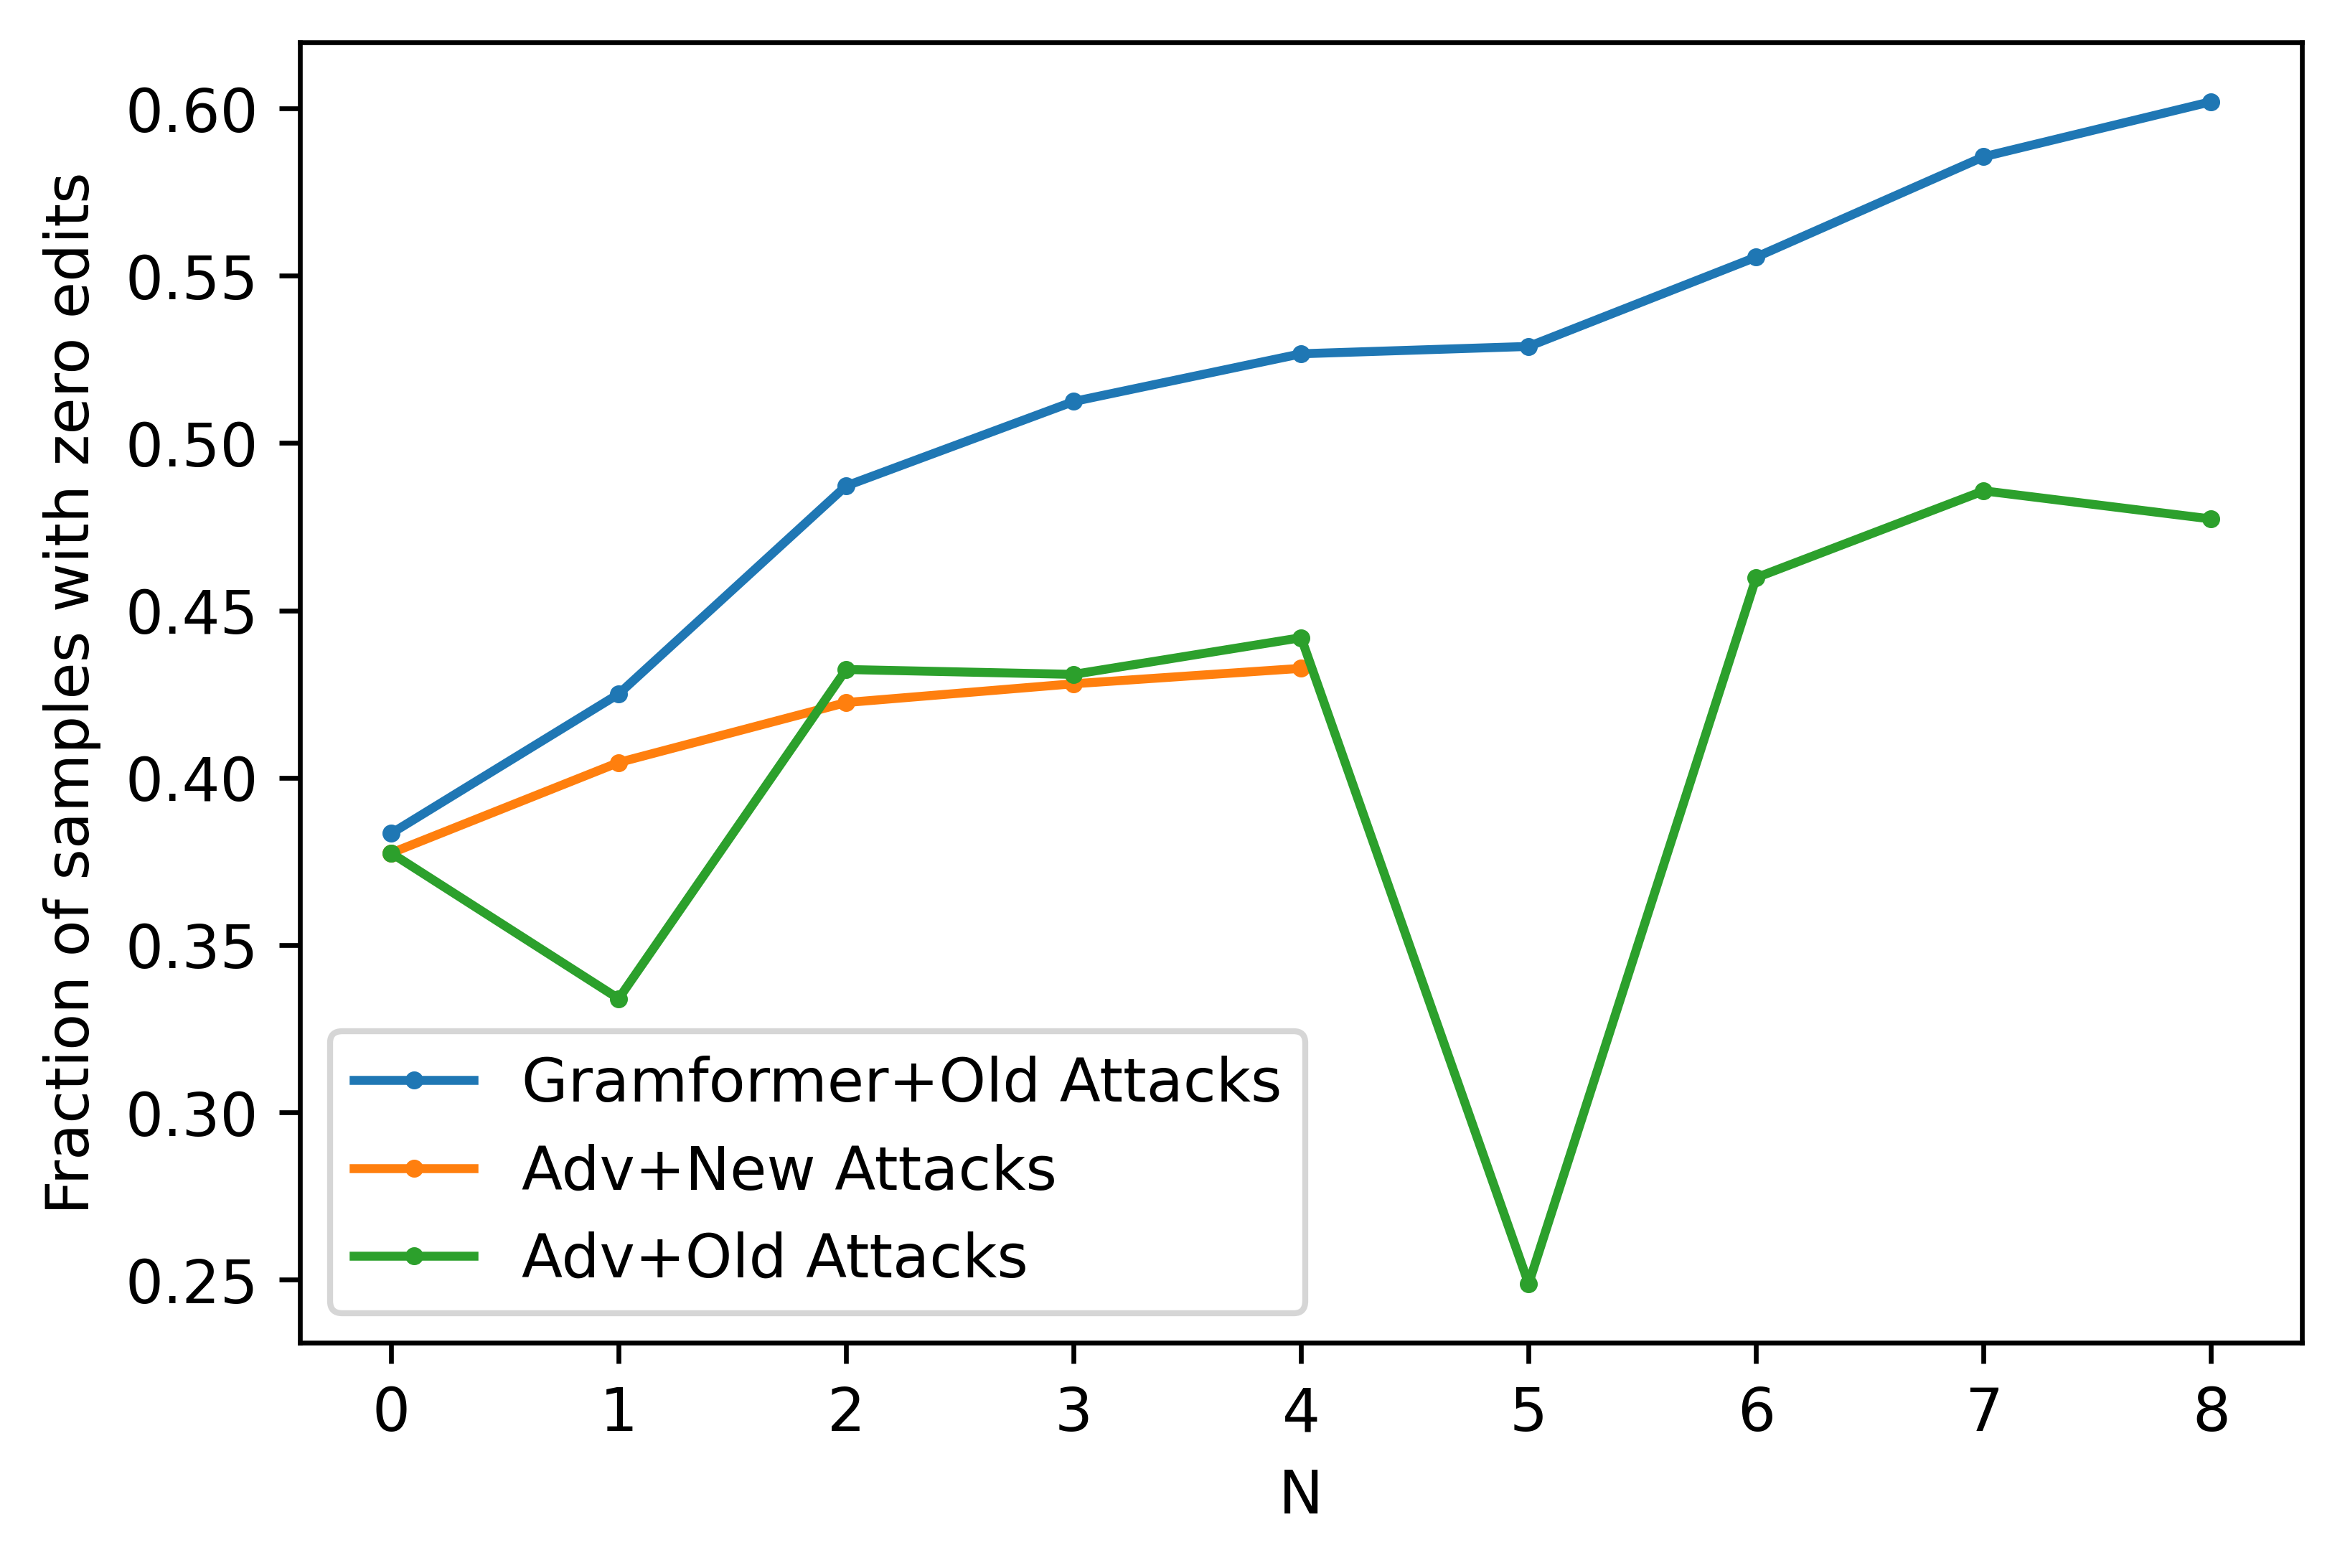

In [8]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)

ax.plot(df2['length'], df2['zero edit rate'], marker='o',markersize=2,label='Gramformer+Old Attacks') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['zero edit rate'], marker='o',markersize=2,label='Adv+New Attacks') # 作y1 = x 图，并标记此线名为linear
ax.plot(df3['length'], df3['zero edit rate'], marker='o',markersize=2,label='Adv+Old Attacks') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Fraction of samples with zero edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化
